<a href="https://colab.research.google.com/github/JASCRAJ/Sketch-literature/blob/main/070624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xml.etree.ElementTree as ET
import re

def is_sepia_beige_cream(color):
    """Check if a color falls within the sepia, beige, or cream spectrum."""
    # Convert hex color to RGB
    match = re.match(r'^#?([a-fA-F0-9]{6})$', color)
    if match:
        hex_color = match.group(1)
        r = int(hex_color[0:2], 16)
        g = int(hex_color[2:4], 16)
        b = int(hex_color[4:6], 16)

        # Sepia tones: Red and green are similar, with red slightly higher, blue is significantly lower
        sepia = r > 100 and g > 50 and b < 50 and r > g and g > b
        # Beige and cream tones: Red, green, and blue are high with red slightly higher
        beige_cream = r > 200 and g > 180 and b > 150 and r > g and g > b
        return sepia or beige_cream
    return False

def remove_fills(svg_file, output_file):
    # Parse the SVG file
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Define the SVG namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}

    # Find all elements with a 'fill' attribute
    for elem in root.findall('.//*[@fill]', namespaces):
        fill_color = elem.get('fill')
        if fill_color.startswith('#') and is_sepia_beige_cream(fill_color):
            elem.set('fill', 'none')

    # Write the modified SVG to a new file
    tree.write(output_file)

# Paths to your input and output SVG files
input_svg_path = '/content/Fall of Man, Adam and Eve.svg'
output_svg_path = '/content/Fall of Man, Adam and Eve-modified.svg'

# Process the SVG file
remove_fills(input_svg_path, output_svg_path)


In [ ]:
import xml.etree.ElementTree as ET
import re

def is_sepia_beige_cream_orange_yellow(color):
    """Check if a color falls within the sepia, beige, cream, orange, or yellow spectrum."""
    # Convert hex color to RGB
    match = re.match(r'^#?([a-fA-F0-9]{6})$', color)
    if match:
        hex_color = match.group(1)
        r = int(hex_color[0:2], 16)
        g = int(hex_color[2:4], 16)
        b = int(hex_color[4:6], 16)

        # Sepia tones: Red and green are similar, with red slightly higher, blue is significantly lower
        sepia = r > 100 and g > 50 and b < 50 and r > g and g > b
        # Beige and cream tones: Red, green, and blue are high with red slightly higher
        beige_cream = r > 200 and g > 180 and b > 150 and r > g and g > b
        # Orange tones: Red is high, green is moderate, blue is low
        orange = r > 200 and g > 100 and b < 100 and r > g and g > b
        # Yellow tones: Red and green are high, blue is low
        yellow = r > 200 and g > 200 and b < 100 and r > g and g > b
        return sepia or beige_cream or orange or yellow
    return False

def remove_fills(svg_file, output_file):
    # Parse the SVG file
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Define the SVG namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}

    # Find all elements with a 'fill' attribute
    for elem in root.findall('.//*[@fill]', namespaces):
        fill_color = elem.get('fill')
        if fill_color.startswith('#') and is_sepia_beige_cream_orange_yellow(fill_color):
            elem.set('fill', 'none')

    # Write the modified SVG to a new file
    tree.write(output_file)

# Paths to your input and output SVG files
input_svg_path = 'Erik Pedersen.svg'
output_svg_path = 'Erik Pedersen_modified.svg'

# Process the SVG file
remove_fills(input_svg_path, output_svg_path)


In [ ]:
import xml.etree.ElementTree as ET
import re
from collections import Counter

def extract_colors(svg_file):
    # Parse the SVG file
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Define the SVG namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}

    # Extract all fill colors
    colors = []
    for elem in root.findall('.//*[@fill]', namespaces):
        fill_color = elem.get('fill')
        if re.match(r'^#([a-fA-F0-9]{6})$', fill_color):
            colors.append(fill_color)

    return Counter(colors)

# Path to your input SVG file
input_svg_path = 'Erik Pedersen_modified.svg'

# Extract colors
color_counts = extract_colors(input_svg_path)

# Display the extracted colors and their counts
color_counts


Counter({'#f7f2f4': 1, '#7d8f63': 2018, '#ceac87': 943})

In [ ]:
import xml.etree.ElementTree as ET
import re

def hex_to_rgb(hex_color):
    """Convert a hex color to an RGB tuple."""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def is_in_color_range(color, lower_hex, upper_hex):
    """Check if a color falls within the specified RGB range."""
    try:
        lower_rgb = hex_to_rgb(lower_hex)
        upper_rgb = hex_to_rgb(upper_hex)

        match = re.match(r'^#?([a-fA-F0-9]{6})$', color)
        if match:
            hex_color = match.group(1)
            r, g, b = hex_to_rgb(hex_color)
            return (lower_rgb[0] <= r <= upper_rgb[0] and
                    lower_rgb[1] <= g <= upper_rgb[1] and
                    lower_rgb[2] <= b <= upper_rgb[2])
    except ValueError:
        return False
    return False

def remove_fills(svg_file, output_file, lower_color='#FF0080', upper_color='#FFFF00'):
    # Parse the SVG file
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Define the SVG namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}

    # Find all elements with a 'fill' attribute
    for elem in root.findall('.//*[@fill]', namespaces):
        fill_color = elem.get('fill')
        if fill_color and fill_color.startswith('#') and is_in_color_range(fill_color, lower_color, upper_color):
            elem.set('fill', 'none')

    # Write the modified SVG to a new file
    tree.write(output_svg_path)

# Paths to your input and output SVG files
input_svg_path = 'Erik Pedersen_modified.svg'
output_svg_path = 'Erik Pedersen_modified_final.svg'

# Process the SVG file
remove_fills(input_svg_path, output_svg_path)


In [ ]:
import xml.etree.ElementTree as ET
import re

def is_stroke_in_range(color):
    """Check if a stroke color falls within the specified RGB range."""
    match = re.match(r'^#?([a-fA-F0-9]{6})$', color)
    if match:
        hex_color = match.group(1)
        r = int(hex_color[0:2], 16)
        g = int(hex_color[2:4], 16)
        b = int(hex_color[4:6], 16)

        # Check if the stroke color falls within the specified RGB range
        return 153 <= r <= 255 or 70 <= g <= 255 or 20 <= b <= 210
    return False

def remove_strokes(svg_file, output_file):
    # Parse the SVG file
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Define the SVG namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}

    # Find all elements with a 'stroke' attribute
    for elem in root.findall('.//*[@stroke]', namespaces):
        stroke_color = elem.get('stroke')
        if stroke_color.startswith('#') and is_stroke_in_range(stroke_color):
            elem.attrib.pop('stroke')  # Remove the stroke attribute

    # Write the modified SVG to a new file
    tree.write(output_file)

# Paths to your input and output SVG files
input_svg_path = '/content/Erik Pedersen.svg'
output_svg_path = 'output.svg'

# Process the SVG file
remove_strokes(input_svg_path, output_svg_path)


In [ ]:
import xml.etree.ElementTree as ET
import re

def is_fill_in_range(color):
    """Check if a fill color falls within the specified RGB range."""
    match = re.match(r'^#?([a-fA-F0-9]{6})$', color)
    if match:
        hex_color = match.group(1)
        r = int(hex_color[0:2], 16)
        g = int(hex_color[2:4], 16)
        b = int(hex_color[4:6], 16)

        # Check if the fill color falls within the specified RGB range
        red_range = range(150, 256)
        green_range = range(70, 256)
        blue_range = range(20, 256)
        # red_range = range(200, 255)
        # green_range = range(110, 255)
        # blue_range = range(110, 255)
        if r in red_range and g in green_range and b in blue_range:
            return True
    return False

# def remove_filled_paths(svg_file, output_file):
#     # Parse the SVG file
#     tree = ET.parse(svg_file)
#     root = tree.getroot()

#     # Define the SVG namespace
#     namespaces = {'svg': 'http://www.w3.org/2000/svg'}

#     # Find all elements with a 'fill' attribute
#     for elem in root.findall('.//*[@fill]', namespaces):
#         fill_color = elem.get('fill')
#         if fill_color.startswith('#') and is_fill_in_range(fill_color):
#             elem.attrib.pop('fill')  # Remove the fill attribute

#     # Write the modified SVG to a new file
#     tree.write(output_file)

def remove_filled_paths(svg_file, output_file):
    # Parse the SVG file
    tree = ET.parse(svg_file)
    root = tree.getroot()

    # Define the SVG namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}

    # Find all elements with a 'fill' attribute
    for elem in root.findall('.//*[@fill]', namespaces):
        fill_color = elem.get('fill')
        if fill_color.startswith('#') and is_fill_in_range(fill_color):
            elem.set('fill', 'none')  # Set fill attribute to 'none' for transparency

    # Write the modified SVG to a new file
    tree.write(output_file)

# Paths to your input and output SVG files
input_svg_path = '/content/Fall of Man, Adam and Eve.svg'
output_svg_path = '/content/Fall of Man, Adam and Eve-out.svg'

# Process the SVG file
remove_filled_paths(input_svg_path, output_svg_path)

In [ ]:
import os
import xml.etree.ElementTree as ET
import re

def is_fill_in_range(color):
    """Check if a fill color falls within the specified RGB range."""
    match = re.match(r'^#?([a-fA-F0-9]{6})$', color)
    if match:
        hex_color = match.group(1)
        r = int(hex_color[0:2], 16)
        g = int(hex_color[2:4], 16)
        b = int(hex_color[4:6], 16)

        # Check if the fill color falls within the specified RGB range
        red_range = range(150, 256)
        green_range = range(70, 256)
        blue_range = range(20, 256)
        # red_range = range(200, 255)
        # green_range = range(110, 255)
        # blue_range = range(110, 255)
        if r in red_range and g in green_range and b in blue_range:
            return True
    return False

def remove_filled_paths(input_path, output_path):
    """Process an SVG file to remove filled paths within a specified color range."""
    tree = ET.parse(input_path)
    root = tree.getroot()

    # Define the SVG namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}

    # Find all elements with a 'fill' attribute
    for elem in root.findall('.//*[@fill]', namespaces):
        fill_color = elem.get('fill')
        if fill_color.startswith('#') and is_fill_in_range(fill_color):
            elem.set('fill', 'none')  # Set fill attribute to 'none' for transparency

    # Write the modified SVG to a new file
    tree.write(output_path)

# Directory paths
input_dir = '/path/to/input/directory/'
output_dir = '/path/to/output/directory/'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each SVG file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.svg'):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename.replace('.svg', '-edited.svg'))
        remove_filled_paths(input_path, output_path)

# List the processed files
processed_files = os.listdir(output_dir)
print("Processed files:", processed_files)


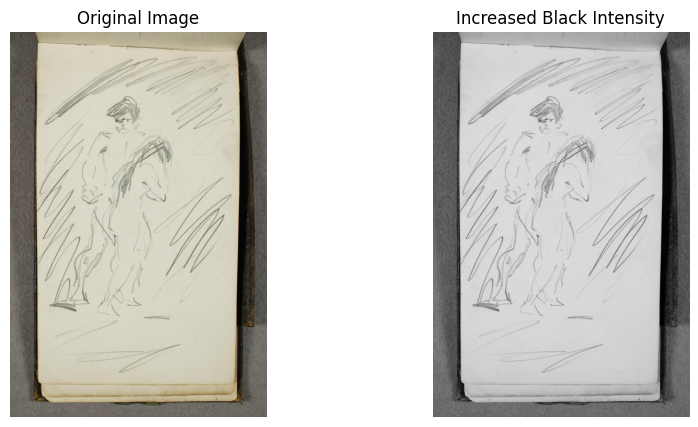

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/FallofMan,AdamandEve.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Increase black intensity by adjusting pixel values
# You can threshold the image to separate black pixels from others
_, black_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY)

# Alternatively, you can simply multiply the grayscale image by a factor to increase black intensity
# Adjust this factor according to your needs
intensity_factor = 0.2
increased_black_image = np.clip(gray_image * intensity_factor, 0, 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(increased_black_image, cmap='gray')
plt.title('Increased Black Intensity')
plt.axis('off')

plt.show()


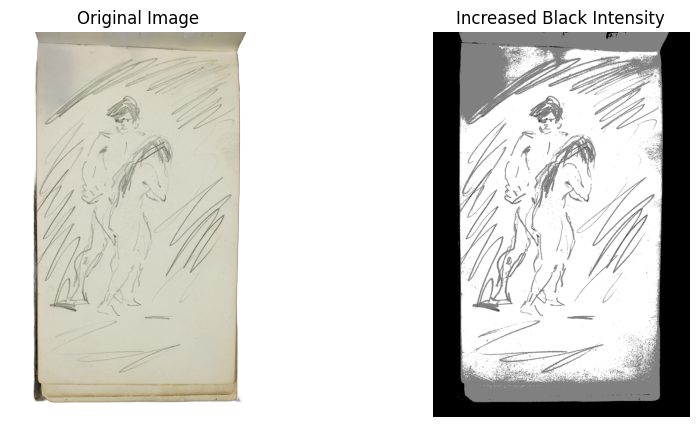

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open the image
image = Image.open('/content/rem_draw_fallofman.jpg')

# Convert the image to grayscale
gray_image = image.convert('L')

# Increase black intensity by adjusting pixel values
# You can threshold the image to separate black pixels from others
# _, black_mask = gray_image.convert('1', dither=Image.NONE).convert('L'),  # Convert to binary then back to grayscale
black_mask = gray_image.point(lambda x: 0 if x < 128 else 255)  # Thresholding to increase black intensity

# Alternatively, you can simply multiply the grayscale image by a factor to increase black intensity
# Adjust this factor according to your needs
intensity_factor = 0.01
increased_black_image = np.clip(np.array(gray_image) * intensity_factor, 0, 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.array(image))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(increased_black_image, cmap='gray')
plt.title('Increased Black Intensity')
plt.axis('off')

plt.show()


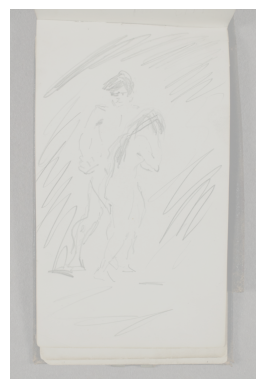

In [ ]:
from PIL import ImageEnhance, Image
import matplotlib.pyplot as plt

# Open the image
image = Image.open('/content/FallofMan,AdamandEve.jpg')

# Enhance the contrast of the image
contrast_factor = 0.
enhancer = ImageEnhance.Contrast(image)
image = enhancer.enhance(contrast_factor)

# Enhance the brightness of the image
brightness_factor = 1.2
enhancer = ImageEnhance.Brightness(image)
image = enhancer.enhance(brightness_factor)

# Display the result
plt.imshow(image)
plt.axis('off')
plt.show()


In [2]:
!pip install lxml


In [3]:
import os
import re
from lxml import etree

def is_fill_in_range(color):
    """Check if a fill color falls within the specified RGB range."""
    match = re.match(r'^#?([a-fA-F0-9]{6})$', color)
    if match:
        hex_color = match.group(1)
        r = int(hex_color[0:2], 16)
        g = int(hex_color[2:4], 16)
        b = int(hex_color[4:6], 16)

        # Check if the fill color falls within the specified RGB range
        red_range = range(150, 256)
        green_range = range(70, 256)
        blue_range = range(20, 256)
        if r in red_range and g in green_range and b in blue_range:
            return True
    return False

def remove_filled_paths(input_path, output_path):
    """Process an SVG file to remove paths with fill colors within a specified range."""
    tree = etree.parse(input_path)
    root = tree.getroot()

    # Define the SVG namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}

    # Find all path elements with a 'fill' attribute
    for elem in root.xpath('.//svg:path[@fill]', namespaces=namespaces):
        fill_color = elem.get('fill')
        if fill_color.startswith('#') and is_fill_in_range(fill_color):
            parent = elem.getparent()
            if parent is not None:
                parent.remove(elem)  # Remove the entire path element

    # Write the modified SVG to a new file
    tree.write(output_path)

# Directory paths
input_dir = 'input'
output_dir = 'output'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Process each SVG file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.svg'):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename.replace('.svg', '-edited.svg'))
        remove_filled_paths(input_path, output_path)

# List the processed files
processed_files = os.listdir(output_dir)
print("Processed files:", processed_files)


Processed files: ['Fall of Man, Adam and Eve-edited.svg', 'Reclining Female Nude-edited.svg', 'Erik Pedersen-edited.svg', 'Portrett av gutten i Historien-edited.svg', 'Men Around a Table-edited.svg', 'Reclining Female Nude1-edited.svg']


In [ ]:
<svg width="500" height="500" xmlns="http://www.w3.org/2000/svg">
  <!-- Background Rectangle -->
  <rect width="100%" height="100%" fill="beige" />

  <!-- Your SVG content goes here -->
  <circle cx="250" cy="250" r="100" fill="blue" />
</svg>
